# Modeling: Option 2

For this modeling approach, we will use all individual Yelp businesses as observations (about 20k) and develop 4 types of classification models: Logistic Regression, KNN, Tree based models, and Voting Classifier. This approach has the advantage of being fast and cheap. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling:-Option-2" data-toc-modified-id="Modeling:-Option-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling: Option 2</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model Preparation</a></span></li><li><span><a href="#Train,-Test-Split" data-toc-modified-id="Train,-Test-Split-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Train, Test Split</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Evaluation Metric</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNN-model" data-toc-modified-id="KNN-model-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>KNN model</a></span></li><li><span><a href="#Trees" data-toc-modified-id="Trees-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Trees</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.6.5.1"><span class="toc-item-num">1.6.5.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Bagging-Classifier" data-toc-modified-id="Bagging-Classifier-1.6.5.2"><span class="toc-item-num">1.6.5.2&nbsp;&nbsp;</span>Bagging Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.6.5.3"><span class="toc-item-num">1.6.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-1.6.6"><span class="toc-item-num">1.6.6&nbsp;&nbsp;</span>Voting Classifier</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-Curve-and-AUC-ROC" data-toc-modified-id="ROC-Curve-and-AUC-ROC-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>ROC Curve and AUC ROC</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Visualize-top-predictor:-category-'chocholate'" data-toc-modified-id="Visualize-top-predictor:-category-'chocholate'-1.8.3.1"><span class="toc-item-num">1.8.3.1&nbsp;&nbsp;</span>Visualize top predictor: category 'chocholate'</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Bonus:-Create-a-funtion-to-predict-using-a-single-Yelp-business-info" data-toc-modified-id="Bonus:-Create-a-funtion-to-predict-using-a-single-Yelp-business-info-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Bonus: Create a funtion to predict using a single Yelp business info</a></span></li></ul></li></ul></div>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

from sklearn.metrics import confusion_matrix, roc_curve, auc, make_scorer, roc_auc_score

import folium
import html
from folium.plugins import MarkerCluster
import ast 

# Styling 
from IPython.display import HTML, display
import tabulate

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

%matplotlib inline

## Load data

In [2]:
yelp = pd.read_csv('./../data/yelp_clean.csv')

In [3]:
yelp.head(2)

,Unnamed: 0,name,review_count,rating,price,cat1,zip_code,nyc,borough,cluster,is_affluent
0,0,Com Tam Ninh Kieu,379,4.0,2,vietnamese,10468,True,Bronx,12,0
1,1,Antonio's Trattoria,773,4.5,2,italian,10458,True,Bronx,12,0


## Preprocessing

In [4]:
# Select feature columns
columns_to_keep = ['review_count', 'rating', 'price', 'cat1', 'is_affluent']
yelp = yelp[columns_to_keep]

In [5]:
# Dummify all categorical columns
def dummify_categorical_columns(df):
    '''
    Dummify all categorical columns
    '''
    categorical_columns = df.select_dtypes(include="object").columns
    return pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [6]:
yelp = dummify_categorical_columns(yelp)

In [7]:
yelp.head(2)

,review_count,rating,price,is_affluent,cat1_afghani,cat1_african,cat1_airportlounges,cat1_arcades,cat1_argentine,cat1_armenian,cat1_artmuseums,cat1_asianfusion,cat1_australian,cat1_austrian,cat1_bagels,cat1_bakeries,cat1_bangladeshi,cat1_barbers,cat1_bars,cat1_basque,cat1_bbq,cat1_beer_and_wine,cat1_beerbar,cat1_beergardens,cat1_belgian,cat1_boating,cat1_bookstores,cat1_bowling,cat1_boxing,cat1_brasseries,cat1_brazilian,cat1_breakfast_brunch,cat1_breweries,cat1_british,cat1_bubbletea,cat1_buffets,cat1_burgers,cat1_burmese,cat1_butcher,cat1_cafes,cat1_cafeteria,cat1_cajun,cat1_cakeshop,cat1_cambodian,cat1_candy,cat1_cantonese,cat1_caribbean,cat1_catering,cat1_champagne_bars,cat1_cheese,cat1_cheesesteaks,cat1_chicken_wings,cat1_chickenshop,cat1_chinese,cat1_chocolate,cat1_cigarbars,cat1_cocktailbars,cat1_coffee,cat1_coffeeroasteries,cat1_colombian,cat1_comedyclubs,cat1_comfortfood,cat1_convenience,cat1_cookingclasses,cat1_cookingschools,cat1_creperies,cat1_cuban,cat1_culturalcenter,cat1_cupcakes,cat1_customcakes,cat1_czech,cat1_danceclubs,cat1_delis,cat1_desserts,cat1_dimsum,cat1_diners,cat1_distilleries,cat1_divebars,cat1_diyfood,cat1_dominican,cat1_donuts,cat1_drugstores,cat1_eatertainment,cat1_egyptian,cat1_empanadas,cat1_ethiopian,cat1_eventplanning,cat1_falafel,cat1_farmersmarket,cat1_festivals,cat1_filipino,cat1_fishnchips,cat1_florists,cat1_fondue,cat1_food,cat1_food_court,cat1_fooddeliveryservices,cat1_foodstands,cat1_foodtrucks,cat1_french,cat1_galleries,cat1_gastropubs,cat1_gaybars,cat1_gelato,cat1_georgian,cat1_german,cat1_giftshops,cat1_gluten_free,cat1_golf,cat1_golflessons,cat1_gourmet,cat1_greek,cat1_grocery,cat1_hair,cat1_haitian,cat1_halal,cat1_hawaiian,cat1_healthmarkets,cat1_herbsandspices,cat1_himalayan,cat1_hkcafe,cat1_hobbyshops,cat1_hookah_bars,cat1_hotdog,cat1_hotdogs,cat1_hotels,cat1_hotpot,cat1_hungarian,cat1_icecream,cat1_indonesian,cat1_indpak,cat1_intlgrocery,cat1_irish,cat1_irish_pubs,cat1_italian,cat1_izakaya,cat1_japacurry,cat1_japanese,cat1_jazzandblues,cat1_juicebars,cat1_karaoke,cat1_kebab,cat1_kids_activities,cat1_kitchenandbath,cat1_korean,cat1_kosher,cat1_landmarks,cat1_laotian,cat1_latin,cat1_laundromat,cat1_lebanese,cat1_localservices,cat1_lounges,cat1_macarons,cat1_magicians,cat1_mags,cat1_malaysian,cat1_markets,cat1_meats,cat1_mediterranean,cat1_mexican,cat1_mideastern,cat1_modern_european,cat1_mongolian,cat1_moroccan,cat1_movietheaters,cat1_museums,cat1_musicvenues,cat1_musicvideo,cat1_newamerican,cat1_newmexican,cat1_nightlife,cat1_nonprofit,cat1_noodles,cat1_organic_stores,cat1_pakistani,cat1_panasian,cat1_pastashops,cat1_persian,cat1_peruvian,cat1_petstore,cat1_pianobars,cat1_pizza,cat1_poke,cat1_polish,cat1_poolhalls,cat1_popuprestaurants,cat1_portuguese,cat1_pretzels,cat1_publicmarkets,cat1_pubs,cat1_puertorican,cat1_ramen,cat1_restaurants,cat1_russian,cat1_salad,cat1_salvadoran,cat1_sandwiches,cat1_scandinavian,cat1_seafood,cat1_seafoodmarkets,cat1_senegalese,cat1_servicestations,cat1_shanghainese,cat1_sharedofficespaces,cat1_shavedice,cat1_shopping,cat1_shoppingcenters,cat1_sicilian,cat1_singaporean,cat1_skate_parks,cat1_soulfood,cat1_soup,cat1_southafrican,cat1_southern,cat1_spanish,cat1_spas,cat1_speakeasies,cat1_sportgoods,cat1_sports_clubs,cat1_sportsbars,cat1_sportswear,cat1_srilankan,cat1_steak,cat1_streetvendors,cat1_supperclubs,cat1_sushi,cat1_szechuan,cat1_tacos,cat1_taiwanese,cat1_tapas,cat1_tapasmallplates,cat1_tattoo,cat1_tea,cat1_teppanyaki,cat1_tex-mex,cat1_thai,cat1_theater,cat1_themedcafes,cat1_tikibars,cat1_tobaccoshops,cat1_tours,cat1_tradamerican,cat1_trinidadian,cat1_turkish,cat1_tuscan,cat1_ukrainian,cat1_uzbek,cat1_vapeshops,cat1_vegan,cat1_vegetarian,cat1_venezuelan,cat1_venues,cat1_vietnamese,cat1_vinyl_records,cat1_waffles,cat1_whiskeybars,cat1_wine_bars,cat1_wraps
0,379,4.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
yelp.shape

(19830, 259)

## Model Preparation

In [9]:
target = 'is_affluent'
X = yelp.drop(columns=target)
y = yelp[target]

## Train, Test Split
1. Since our dataset is large enough, we will reserve 20% of the data as test data. 
2. We will use 'stratify = y' to ensure the the proportion of classes are consistent in both train and test.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

The distributions of Y shows that we have unbalanced classes: 67.83% of the Ys are in the positive class; 32.20% are in the negative class.

In [11]:
# Check distribution of y, to see if y has unblanced classes
y.value_counts(normalize=True)

1    0.678316
0    0.321684
Name: is_affluent, dtype: float64

## Modeling

- In the modeling process, we will first establish a baseline model.  
- We will then develop 4 major categories of models: Logistic Regression, KNN, Trees, and Voting Classifier. 
- Based on the grid search's cross validation score, we will then fine tune the hyper-parameters for each model to achieve the optimal result. 

### Evaluation Metric

- We will use AUC ROC as the metric to evaluate the models.
- "ROC (Receiver Operating Characteristic) is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes"[(reference)](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). The higher the ROC, and the better it separates the two classes. The ROC curve is plotted with True Positive Rate on y-aixs, against the False Positive Rate on the x-axis.

- AUC (Area Under the Curve) measures the entire two-dimensional area underneath the entire ROC curve. The closer AUC to 1, the better the model.

- We choose AUC ROC since we aim to find the optimal model that can separate the two classes, "is affluent", "not affluent". 

- We will also consider the amount of time each model take to fit. If two models have similar AUC ROC scores, the one that runs faster will be the model we choose. 

###  Baseline Model
The AUC ROC score for the baseline model is 0.5.

In [12]:
# The percent of the positive class. We have unbalanced classes in the Y varibles.
y_test.value_counts(normalize=True)[1]

0.6782652546646495

### Logistic Regression

In [13]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('lr', LogisticRegression(solver='liblinear'))
])

pipe_params ={
    'lr__C': [1], #[0.0001, 1]
    'lr__penalty' : ['l1'] #['l1', 'l2']
    }

gs_lr = GridSearchCV(pipe, 
                     pipe_params, 
                     cv=5,
                     scoring='roc_auc')


In [14]:
gs_lr.fit(X_train, y_train);

In [15]:
# Check the optimal params
gs_lr.best_params_

{'lr__C': 1, 'lr__penalty': 'l1'}

In [16]:
# Train score
gs_lr.score(X_train, y_train)

0.7229411908568808

In [17]:
# Cross val score on the whole dataset 
cross_val_score(gs_lr.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6789063277657604

In [18]:
# Test score
gs_lr.score(X_test, y_test)

0.7052678269685704

Comparing to the baseline AUC ROC score of 0.5, the model performs okay on both train and test data, but shows slight signs of overfitting, since the train socre is higher than the test score.
Based on the grid search, Lasso regularization is the more effecient loss function to limit the amount of features used in the model. 

### KNN model

In [19]:
pipe_knn = Pipeline(steps=[
    ('ss', StandardScaler()),  
    ('knn', KNeighborsClassifier())
])

pipe_params_knn ={
    'knn__n_neighbors' : [50] #[5, 10, 30, 50]
    
}

gs_knn = GridSearchCV(pipe_knn, 
                      pipe_params_knn, 
                      cv=5,
                      scoring='roc_auc')

In [20]:
gs_knn.fit(X_train, y_train);

In [21]:
# Check the optimal params
gs_knn.best_params_

{'knn__n_neighbors': 50}

In [22]:
# Train score
gs_knn.score(X_train, y_train)

0.7247560307839712

In [23]:
# Cross val score on the whole dataset 
cross_val_score(gs_knn.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.664584993062341

In [24]:
# Test score
gs_knn.score(X_test, y_test)

0.6860357355117641

Comparing to the baseline AUC ROC score of 0.5, the model performs okay on the train data but worse on the test data. It shows signs of overfitting. 
50 neighbors proves to be the best hyper param setting to form a neighorhood.

### Trees

#### Decision Tree

In [25]:
pipe_dt = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('dt', DecisionTreeClassifier(random_state=42))
])

pipe_params_dt = {
    'dt__max_depth': [5], #[3, 5]
    'dt__min_samples_split': [2], #[2, 3]
    'dt__min_samples_leaf': [5]} #[1, 5, 10]

gs_dt = GridSearchCV(pipe_dt, 
                     pipe_params_dt, 
                     cv=5,
                     scoring='roc_auc')

In [26]:
gs_dt.fit(X_train, y_train);

In [27]:
# Check the optimal params
gs_dt.best_params_

{'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 2}

In [28]:
# Train score
gs_dt.score(X_train, y_train)

0.7001985563337084

In [29]:
# Cross val score on the whole dataset 
cross_val_score(gs_dt.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6778253354750048

In [30]:
# Test score
gs_dt.score(X_test, y_test)

0.6810107387164814

Comparing to the baseline AUC ROC score of 0.5, the model performs okay on the train data, but worse on the test data. It shows some signs of overfitting. 
To reduce variance, we will develop an esemble model: Bagging Classifier.

#### Bagging Classifier

In [31]:
pipe_bc = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('bc', BaggingClassifier(random_state=42))
])

pipe_params_bc = {
    'bc__n_estimators': [20], #[15, 20]
    'bc__max_samples': [7]} #[3, 5, 7]

gs_bc = GridSearchCV(pipe_bc, 
                     pipe_params_bc, 
                     cv=5,
                     scoring='roc_auc')

In [32]:
gs_bc.fit(X_train, y_train);

In [33]:
# Check the optimal params
gs_bc.best_params_

{'bc__max_samples': 7, 'bc__n_estimators': 20}

In [34]:
# Train score
gs_bc.score(X_train, y_train)

0.5861833899397528

In [35]:
# Cross val score on the whole dataset 
cross_val_score(gs_bc.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6640140611216674

In [36]:
# Test score
gs_bc.score(X_test, y_test)

0.5903519070981577

Comparing to the baseline AUC ROC score of 0.5, the model performs badly on both training and testing, and show slight signs of under-fitting. In addition, the difference between cross val and test score is significant, which means we cannot rely on the test score to evaluate the performance of the model. 

#### Random Forest

In [37]:
pipe_rf = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('rf', RandomForestClassifier(random_state=42))
])

pipe_params_rf = {
    'rf__max_depth': [13], #[11, 13]
    'rf__min_samples_split': [2], #[2, 3]
    'rf__min_samples_leaf': [10]} #[1, 5, 10]


gs_rf = GridSearchCV(pipe_rf, 
                     pipe_params_rf, 
                     cv=5,
                     scoring='roc_auc')

In [38]:
gs_rf.fit(X_train, y_train);

In [39]:
# Check the optimal params
gs_rf.best_params_

{'rf__max_depth': 13, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 2}

In [40]:
# Train score
gs_rf.score(X_train, y_train)

0.7291463448900972

In [41]:
# Cross val score on the whole dataset 
cross_val_score(gs_rf.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6881256004443872

In [42]:
# Test score
gs_rf.score(X_test, y_test)

0.6972586556502081

Comparing to the baseline AUC ROC score of 0.5, the model performs okay on training, but worse on the test. Again, it shows signs of overfitting. 

### Voting Classifier

In [43]:
vc = VotingClassifier(estimators=[('lr', gs_lr), 
                                  ('knn', gs_knn), 
                                  ('dt', gs_dt),
                                  ('bc', gs_bc),
                                  ('rf', gs_rf)], 
                      voting='soft')

In [44]:
vc.fit(X_train, y_train);

In [45]:
#Define a function to calculate AUC ROC score for the Voting Classifier
def auc_roc_score(model, X, y):
    y_proba = vc.predict_proba(X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_proba[:,1])
    auc_roc = round(auc(false_positive_rate, true_positive_rate), 5)
    return auc_roc

In [46]:
# Train socre
auc_roc_score(vc, X_train, y_train)

0.74255

In [47]:
# Test score
auc_roc_score(vc, X_test, y_test)

0.71323

In [48]:
cross_val_score(vc, X, y, scoring='roc_auc', cv=5).mean()

0.6991489794300441

The ensemble model performs better than the others, but again, shows some signs of overfitting. 

## Model Selection

Define functions that will generate and display AUC ROC scores for all the models.

In [49]:
# Define a funciton that takes a list of models (could be a list of one model), 
# Returns the AUC ROC score
def evaluation_metrics(list_of_models, X, y):
    table = [['Model Name', 'AUC ROC']]
    for name, model in list_of_models:
        y_proba = model.predict_proba(X)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_proba[:,1])
        auc_roc = round(auc(false_positive_rate, true_positive_rate), 5)
        
        table.append([name, auc_roc])
    return table

In [50]:
# Define a funciton that will pretty-print tabular data in Python
def display_evaluation_metrics(table):
    return display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [51]:
table_test = evaluation_metrics([('Logistic Regression', gs_lr), 
                                 ('KNN', gs_knn),
                                 ('Decision Tree', gs_dt),
                                 ('Bagging Classifier', gs_bc),
                                 ('Random Forest', gs_rf),
                                 ('Voting Classifier', vc)
                                ],
                                X_test, y_test)

In [52]:
display_evaluation_metrics(table_test)

Model Name,AUC ROC
Logistic Regression,0.70527
KNN,0.68604
Decision Tree,0.68101
Bagging Classifier,0.59035
Random Forest,0.69726
Voting Classifier,0.71323


Based on the test scores, Voting Classifier is the best proforming model, followed by Logistic Regression model. 

## Model Evaluation

The model evaluation will contain two parts: 
1. The Voting Classifier is our best model for prediciton. We will evaluate the model's performances based on it's predicting power.
2. The Logistic Regression model is our best model for interpretation. We will interpret the Coefficients based on the result of the logistic regression. 

### Confusion Matrix

In [53]:
y_pred = vc.predict(X_test)

In [54]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

In [55]:
cm = confusion_matrix(y_test, y_pred)

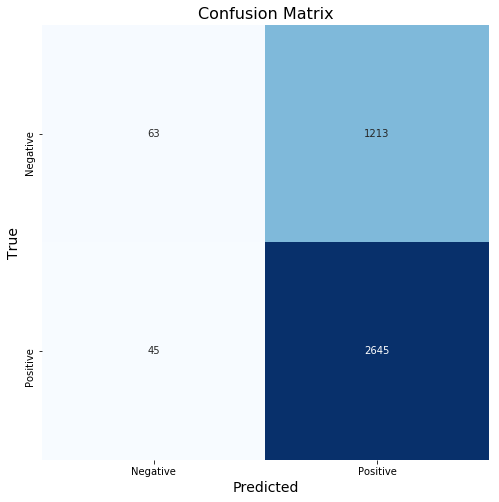

In [56]:
plt.figure(figsize = (8,8))
ax = plt.subplot()
sns.heatmap(cm, 
            annot=True, 
            ax = ax, 
            fmt='g', 
            cbar=False,
            cmap="Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix', size=16)
ax.set_xlabel('Predicted', size=14)
ax.set_ylabel('True', size=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

For the Voting Classifier, the 4 classes of confusion matrix are as follows:

True Positive: 2653  
False Positive (Type 1): 1214  
True Negative: 62  
False Negative (Type 2): 37    

A perfect classifier would have only TP and TN, so its confusion matirx would have nonzero values only on the top-left to bottom right diagonal. As we can see here, the diagonal from top left to bottom right are our correct predictions (TN and TP). We have a large number of TP, but also a large number of FP, which shows the limitation of this model.

### ROC Curve and AUC ROC

In [57]:
y_pred_proba = vc.predict_proba(X_test)

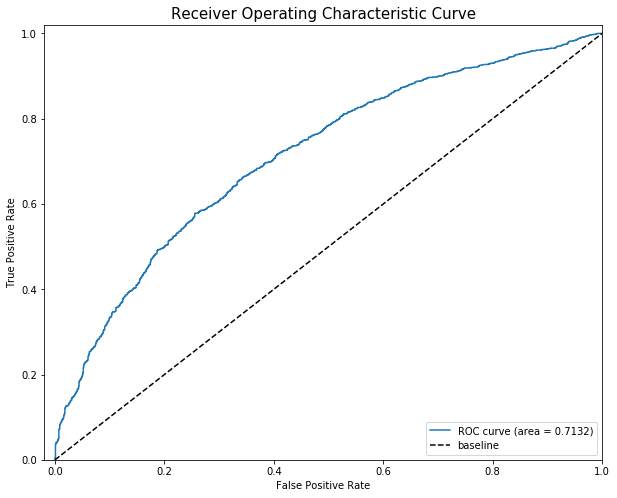

In [58]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
fpr, tpr, _= roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)


# Plot of a ROC curve for a specific class
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='baseline')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve', fontsize=15)
plt.legend(loc="lower right")

The ROC curve helps us to visualize our tradeoff between sensitivity and specificity and understand how well-separated our classes are. The ROC curve is generated by varying our threshold from 0 to 1. The best threshold is the point on the curve where it's closest to the top left corner. 

In addiction, the AUC ROC measures how well the classifier seperates the two classes, affluent and not affluent. AUC ROC score ranges from 0 to 1. The closer it is to 1, the better the classifier seperates the two classes. As we can see from the above plot, the Voting Classifier' AUC ROC score is 0.7134, which means our model is mediocre at separating the two classes.

### Model Interpretation

In [59]:
# Create a dataframe that conbines feature names and coefficients
top_features = pd.DataFrame(list(zip(X_test.columns.values, gs_lr.best_estimator_.steps[1][1].coef_.ravel() )), 
               columns=['features', 'coefficient'])

In [60]:
top_features = top_features.sort_values(by='coefficient')

In [61]:
# Find the top 10 strongest predictors for the positive class
df_1 = top_features.sort_values(by=['coefficient'], ascending=False).head(10)

In [62]:
# Find the top 10 strongest predictors for the negative class
df_2 = top_features.sort_values(by=['coefficient'], ascending=False).tail(10)

In [63]:
df_1_and_2 = pd.concat([df_1, df_2], ignore_index=True)

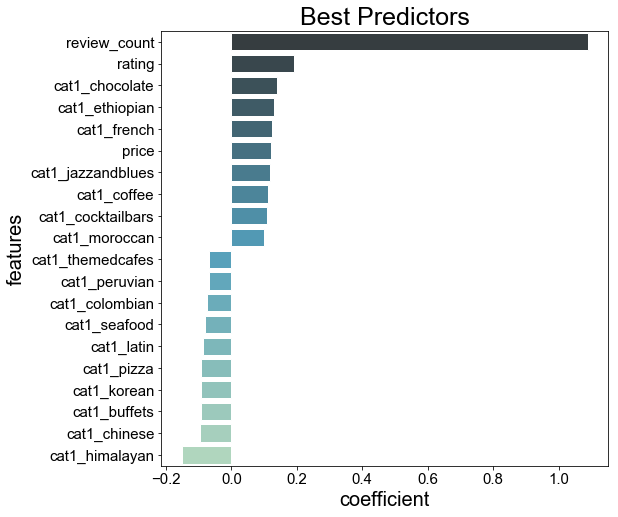

In [64]:
plt.figure(figsize=(8,8))
plt.title('Best Predictors',fontsize=25)
sns.set_style("darkgrid")
sns.barplot(data=df_1_and_2 ,x='coefficient',y='features',orient='h', palette="GnBu_d")
plt.xlabel('coefficient',fontsize=20)
plt.ylabel('features',fontsize=20)
plt.tick_params(labelsize=15)

- Let's first look at the top 10 predictors for our positive class (affluent): 

Surprisingly, `review_count` is the strongest predictor for the positive class. Based on the coefficient, a one-unit change in review_count causes the observation' to be e^(1.088083) times as likely to be 'affluent'. The potential reason might be: More review counts indicate higher volumes of costumers, which means the location might have a higher density of population and/or higher traffic. 

The second strongest predictor for the positive class is `rating`: a one-unit change in rating causes the observation to be e^(0.190824) times as likely to be 'affluent'.
 

To answer our client's question, i.e. whether the Yelp dollar sign can be used to predict whether the neighborhood is affluent or not, based on the coefficient, a one-unit change in `price` causes the observation to be e^(0.122521) times as likely to be affluent. Although this feature is among the top 10 strongest predictors for the positive class, it ranked below category = chocolate, Ethiopian, and French. To explain this more intuitively, having more Chocolate stores, Ethiopian restaurants, or French restaurants is a better predictor for an affluent neighborhood.

- Let's now look at the top 10 predictors for our negative class (not affluent):

The top predictors are all restaurant categories, such as Himalayan, Chinese, buffets, Korean, and Pizza. This makes intuitive sense for NYC. These make intuitive sense in the context of NYC: less affluent neighborhoods such as Flushing has a higher concentration of Chinese restaurants. Similarly, some less affluent neighborhoods tend to have  many Pizzerias since it is a cheaper option.

#### Visualize top predictor: category 'chocholate'
One of the strongest predictors for the positive class is the category 'chocolate'. Does this make intuitive sense? i.e. Chocolate stores are more likely located in affluent neighborhoods. Let's visualize all the chocolate stores in NYC and see which neighborhoods they are located.

In [65]:
# Visualization Preparation
yelp_2 = pd.read_csv('./../data/raw.csv')

In [66]:
# Quick Data Cleaning
yelp_2['latitude'] = [ast.literal_eval(i)['latitude'] for i in yelp_2['coordinates']]
yelp_2['longitude'] = [ast.literal_eval(i)['longitude'] for i in yelp_2['coordinates']]
yelp_2 = yelp_2.drop(columns=['Unnamed: 0','phone','display_phone','image_url','url','distance','alias','is_closed',
                             'id','transactions'],axis=1)
yelp_2 = yelp_2.dropna()
yelp_2['cat1'] = [list(ast.literal_eval(yelp_2['categories'][i])[0].values())[0] for i in yelp_2.index]

In [67]:
# Only choose chocolate stores
df_cho = pd.DataFrame(yelp_2.loc[yelp_2['cat1'] == 'chocolate'])
df_cho['combined'] = df_cho[['latitude','longitude']].values.tolist()
df_cho = df_cho.reset_index(drop=True)

In [68]:
# Create the map

# Thanks to Amy Bear for sharing the link of this source! 
# Referenc3: https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/

#Define coordinates of where we want to center our map
nyc_coords = [40.7128, -74.0060]

#Create the map
nyc_map = folium.Map(location = nyc_coords, zoom_start = 12)

In [69]:
# Add markers to map
for i in df_cho['combined'].index:
    name = list(df_cho['name'].values)[i]
    folium.Marker(df_cho['combined'][i], popup = html.escape(name)).add_to(nyc_map)
nyc_map

As we can see, Chocolate stores are located in neighborhoods such as Upper West Side, Midtown, Soho, Dumbo, and Williamsburg, which are well-known affluent neighborhoods in NYC. 

In [70]:
# Export map as html file
nyc_map.save('./../images/chocolate_stors_nyc.html')

## Conclusion

Although Yelp's $ sign is among the top 10 predictors, it alone cannot be the sole predictor of a neighborhood's affluency. To increase predicting power, it would be best to combine with other characteristics of a Yelp business. 

For option 2, the best performing model is the Voting Classifier. This model has an AUC ROC score of 0.7134, comparing with the baseline score of 0.5. Although the model does not have the optimal AUC ROC score, it can still serve our client's purpose as a fast and cheap estimator for a given neighborhood's affluency. 

The advantage of this model is that it does not rely on past U.S census data to calculate the neighborhood's affluency, but rather using an individual Yelp business's characteristics to predict the affluency of the neighborhood where the business is located. Our client can input a single Yelp business information, such as rating, review_counts, and categorical, and get a fast prediction of the neighborhood’s affluency status. 

In addition, since no geographical features have been used as features to train our models, we assume that the model will be transferable to other urban neighborhoods outside of NYC. The possibility of this generalization will be explored in the future.  

## Bonus: Create a funtion to predict using a single Yelp business info

Our client can use the following function to make a quick prediction of a neighborhood's affluence, using a single Yelp business's information. Please see demo below.

In [71]:
# Create a detault row with all features = 0
def default_row():
    row = X.loc[0]
    for column in row.index:
        row[column] = 0
    return row

In [72]:
def prediciton(review_count, rating, price, category, model=vc):
    '''
    Takes a model name (default = vc), review_count, rating, price, and category
    Return binary value: 1 = affluent, 0 = not affluent
    '''
    row = default_row()
    row['review_count'] = review_count
    row['rating'] = rating
    row['price'] = price
    if category in yelp_2['cat1'].unique().tolist():
        row[f'cat1_{category}'] = 1
    row = np.array(row).reshape(1, -1)
    return model.predict(row)

Let's use [Boucherie Union Square](https://www.yelp.com/biz/boucherie-union-square-new-york)'s Yelp information to test out our model.
Boucherie Union Square has 723 reviews, 5 star rating, price of $$$, and is a French restaurent. We can input this information into the funciton and check the predicited result. 

In [73]:
# our model will predict its neighborhood to be not affluent
prediciton(review_count=723, rating=5, price=3, category='French')

array([1])

As we can see here, the prediction shows that the restaurant is located in an affluent neighborhood.